# Classification

In [1]:
# %load_ext autoreload
# %autoreload 2

import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '..'))

In [2]:
from sklearn.datasets import make_circles
import numpy as np

np.random.seed(17)

SAMPLES = 400
X, y = make_circles(n_samples=SAMPLES, noise=0.05, factor=0.75)
y = y[:, np.newaxis]

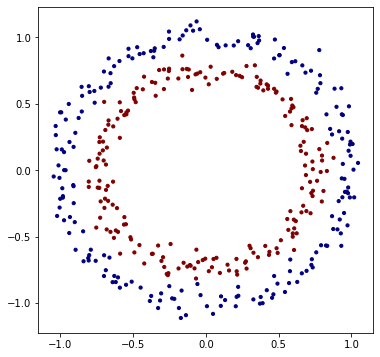

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='jet')

In [4]:
def metrics(y_pred, labels):
    loss = labels * y_pred.log() + (1 - labels) * (1 - y_pred).log()
    loss = loss.sum() / -SAMPLES

    y_pred_class = np.where(y_pred.data < 0.5, 0, 1)
    accuracy = np.sum(labels.data == y_pred_class) / SAMPLES

    return loss, accuracy

In [5]:
from tensorflood.engine import Graph, Variable
from tensorflood.nn import NeuralNetwork, Optimizer
from utils import save_contour_figure, create_contour_gif

with Graph() as g:
    inputs = Variable(X, name='X')
    labels = Variable(y, name='y')
    
    model = NeuralNetwork(input_dim=2, units=[16, 16, 1])
    optimizer = Optimizer(model.get_params(), lr=0.1)
    
    EPOCHS = 400
    for epoch in range(EPOCHS + 1):
        optimizer.zero_grad()

        y_pred = model(inputs)
        loss, accuracy = metrics(y_pred, labels)

        loss.backward()
        optimizer.step()
        
        if epoch % 25 == 0:
            print("Epoch {} - loss: {} - accuracy: {}" \
                  .format(epoch, loss.data, accuracy))
            
        save_contour_figure(X, y, model, epoch)

Epoch 0 - loss: 0.7893579548484491 - accuracy: 0.495
Epoch 25 - loss: 0.6910344624800233 - accuracy: 0.5075
Epoch 50 - loss: 0.6648616938310539 - accuracy: 0.625
Epoch 75 - loss: 0.6456333421515927 - accuracy: 0.665
Epoch 100 - loss: 0.6236665389081737 - accuracy: 0.7675
Epoch 125 - loss: 0.5956578888548107 - accuracy: 0.845
Epoch 150 - loss: 0.5657327243610358 - accuracy: 0.9
Epoch 175 - loss: 0.530828254042475 - accuracy: 0.9525
Epoch 200 - loss: 0.49273205441365453 - accuracy: 0.9725
Epoch 225 - loss: 0.449920457156778 - accuracy: 0.985
Epoch 250 - loss: 0.4044520971531606 - accuracy: 0.985
Epoch 275 - loss: 0.35774564652053525 - accuracy: 0.9875
Epoch 300 - loss: 0.31279204982069614 - accuracy: 0.99
Epoch 325 - loss: 0.2712295150304236 - accuracy: 0.9925
Epoch 350 - loss: 0.23440031990118462 - accuracy: 0.995
Epoch 375 - loss: 0.20263476775451258 - accuracy: 0.995
Epoch 400 - loss: 0.17571199904570645 - accuracy: 0.9975


In [6]:
create_contour_gif('classification.gif')